<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week12_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###파이썬 머신러닝 완벽가이드
ch7.1~2 / p.431-449

##07. 군집화
###01. K-평균 알고리즘 이해
: 군집 중심점(centroid)라는 특정한 임의의 지점을 선택해 가까운 포인트들 군집화함
- 군집 중심점-> 선택된 포인트의 평균 지점으로 이동 ... 반복
- 2개로 군집화 시 2개의 중심 놓음
- 중심점 이동했는데 데이터의 중심점 소속 변경 없으면 군집화 종료

**k-평균 단점**
- 속성 개수 많을 경우 정확도 떨어짐
- cluster 선택 어려움

**사이킷런 KMeans 클래스
- n_clusters : 군집중심점 개수
- init : 초기 좌표 설정 방식, k-means++
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 중심점 좌표
- fit, fit_transform 메서드로 수행

In [3]:
#class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=O.0001,
#precompute_distances='auto', verbose=0, random_state=None,
#copy_x=True, n_Jobs=1, algorithm='auto')

In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

iris= load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF= pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
# 3개 그룹으로 군집화
kmeans= KMeans(n_clusters=3, init= 'k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [6]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [7]:
# target과 cluster 값 개수 비교
irisDF['target']= iris.target
irisDF['cluster']= kmeans.labels_
iris_result= irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


- target2 값 데이터는 분산돼 그루핑
- 군집화 시각화 (pca로 2개로 차원축소)

In [8]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
pca_transformed= pca.fit_transform(iris.data)

irisDF['pca_x']= pca_transformed[:,0]
irisDF['pca_y']= pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


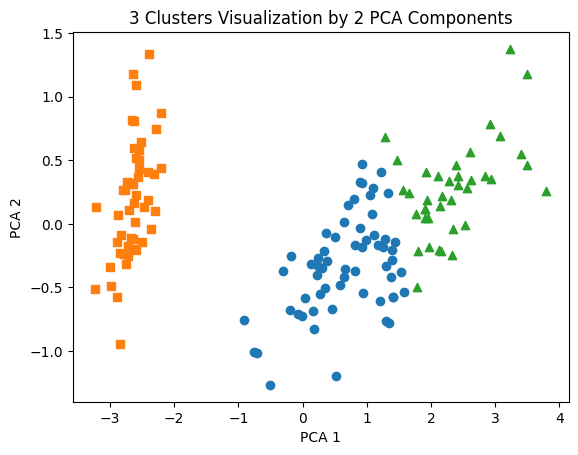

In [10]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind= irisDF[irisDF['cluster']==0].index
marker1_ind= irisDF[irisDF['cluster']==1].index
marker2_ind= irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o,s,^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

**군집화 알고리즘 테스트를 위한 데이터 생성**
- 생성기
1. make_blobs() - 개별 군집의 중심점과 표준편차 제어
2. make_classification() API - 노이즈 포함한 데이터를 만드는데 유용하게 사용
3. make_circle(), make_moon() API - 중심 기반 군집화로 해결하기 어려운 세트 만드는데 사용됨

- make_blobs() 사용법 -> 호출 시 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환됨
- 파라미터 : centers (군집 수), cluster_std (군집 데이터의 표준 편차)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
#y 안에 들어있는 고유한 값들을 찾고, 몇 번 등장하는지 counts까지 함께 반환
unique, counts= np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- clusterDF 데이터프레임 생성
- y는 타깃 컬럼

In [12]:
import pandas as pd

clusterDF= pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


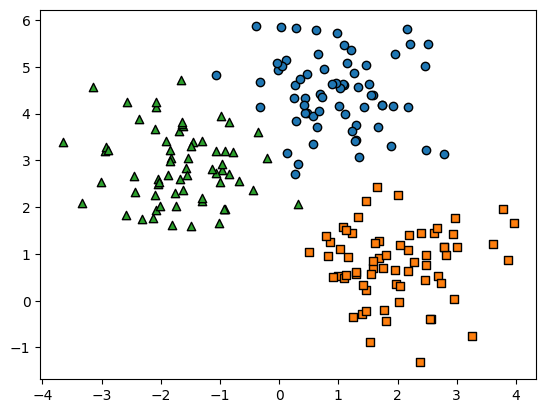

In [14]:
# 피처 데이터 세트가 갖는 군집화 분포 확인
target_list= np.unique(y)

# 각 타깃별 산점도의 마커 값
markers=['o','s','^','P','D','H','x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster= clusterDF[clusterDF['target']==target]
    plt.scatter(x= target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker= markers[target])
plt.show()


- 군집별로 시각화!
- KMeans 에 fit_predict(x) -> 피처 데이터인 x 데이터 군집화

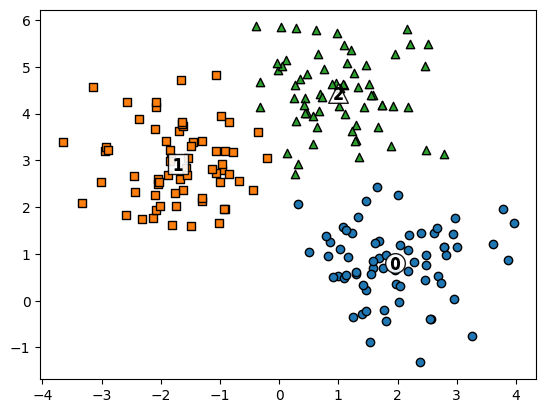

In [16]:
# KMeans 객체를 이용해 x 데이터를 K-Means 클러스터링 수행
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter=200,
               random_state=0)
cluster_labels= kmeans.fit_predict(X)
clusterDF['kmeans_label']= cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers= kmeans.cluster_centers_
unique_labels= np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster= clusterDF[clusterDF['kmeans_label']==label]
    center_x_y= centers[label]
    plt.scatter(x= label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', marker='$%d$' % label)
plt.show()

In [17]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


- 잘 매핑됨
- make_blobs()는 cluster_std로 데이터의 분포도 조절
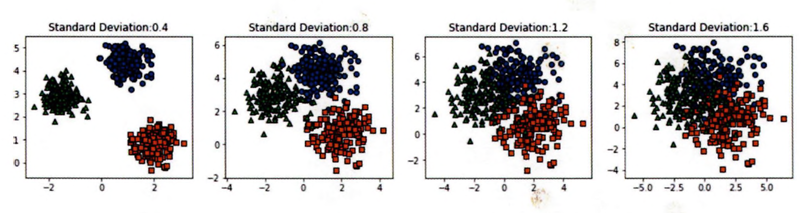

###02. 군집 평가
: 실루엣 분석 활용

: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타냄 = 다른 군집과 멀고 동일 군집끼리의 데이터 가까움
- 실루엣 계수 기반 -> 개별 데이터가 갖는 군집화 지표

s(i) = (b(i) - a(i)) / (max(a(i), b(i))
- 같은 군집 내 다른 데이터 포인트와의 거리 평균 a(i)
- 타 군집 중 가장 가까운 군집과의 평균 b(i)
- 1에 가까울수록 타 군집과 멀리 떨어짐

**메서드**
1. sklearn.metrics.silhouette_samples(X, labels, metric= 'euclidean**kwds) : 각 데이터 포인트의 실루엣 계수 계산
2. sklearn.metrics.silhouette_score(X, labels, metric= 'euclideansam이e_size=None, **kwds) : 전체 데이터의 실루엣 계수 평균값 = np.mean(silhouette_samples())

**좋은 군집화**
- silhouette_score() 값 0~1 중 1에 가까움
- 개별 군집의 계수 평균값이 전체 계수 평균값과 크게 다르지 않음

In [19]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris= load_iris()
feature_names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF= pd.DataFrame(data= iris.data, columns= feature_names)
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter=300,
               random_state=0).fit(irisDF)
irisDF['cluster']= kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples= silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']= score_samples

average_score= silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [20]:
# 군집별 평균 실루엣 계수 값 확인
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

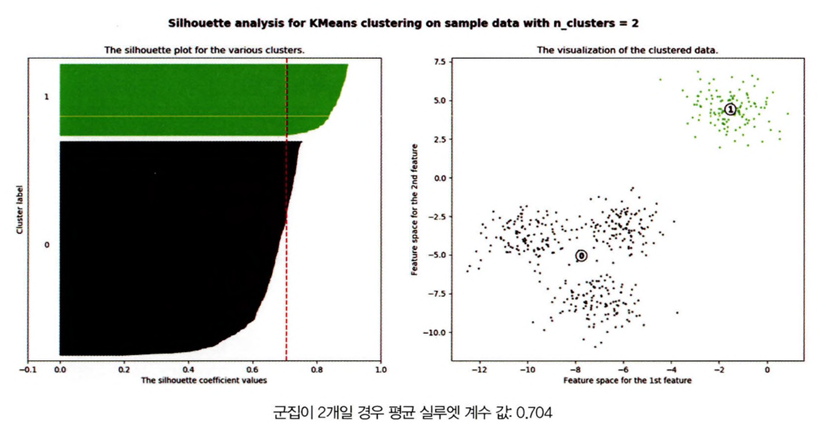
- 4개의 군집, 절반 이상이 평균보다 높은 계수값 가짐 -> 이상적인 군집화 개수
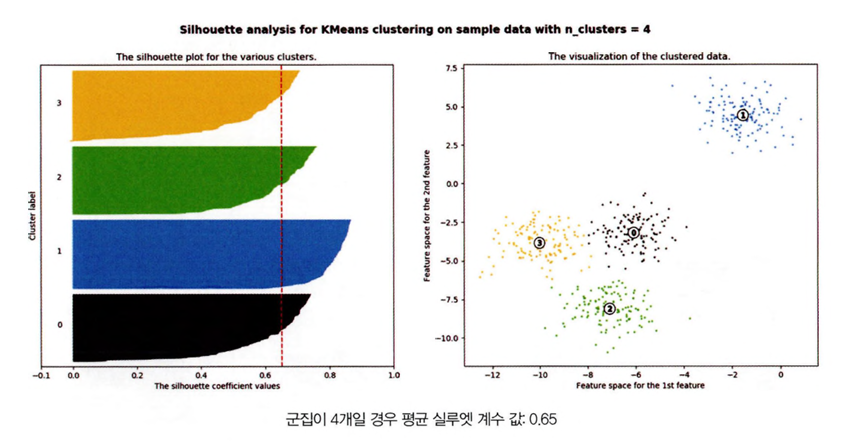

In [23]:
# 군집 개수에 따른 군집별 평균 실루엣 계수값

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt

import matplotlib.cm as cm

import numpy as np


def visualize_silhouette(cluster_list, X):

    from matplotlib import pyplot as plt


    for n_clusters in cluster_list:

        fig, ax1 = plt.subplots(1)

        fig.set_size_inches(6, 4)

        ax1.set_xlim([-0.1, 1])

        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


        kmeans = KMeans(n_clusters=n_clusters, random_state=10)

        cluster_labels = kmeans.fit_predict(X)


        silhouette_vals = silhouette_samples(X, cluster_labels)

        silhouette_avg = silhouette_score(X, cluster_labels)


        y_lower = 10

        for i in range(n_clusters):

            ith_silhouette_vals = silhouette_vals[cluster_labels == i]

            ith_silhouette_vals.sort()

            size_cluster_i = ith_silhouette_vals.shape[0]

            y_upper = y_lower + size_cluster_i


            color = cm.nipy_spectral(float(i) / n_clusters)

            ax1.fill_betweenx(np.arange(y_lower, y_upper),

                              0, ith_silhouette_vals,

                              facecolor=color, edgecolor=color, alpha=0.7)


            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10


        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_title(f"Silhouette plot for {n_clusters} clusters")

        ax1.set_xlabel("Silhouette coefficient values")

        ax1.set_ylabel("Cluster label")


        plt.tight_layout()

        plt.show()

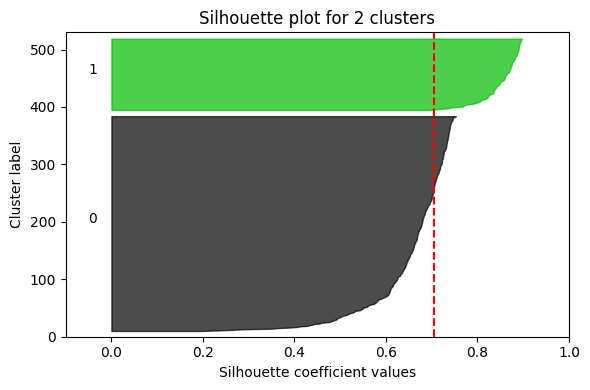

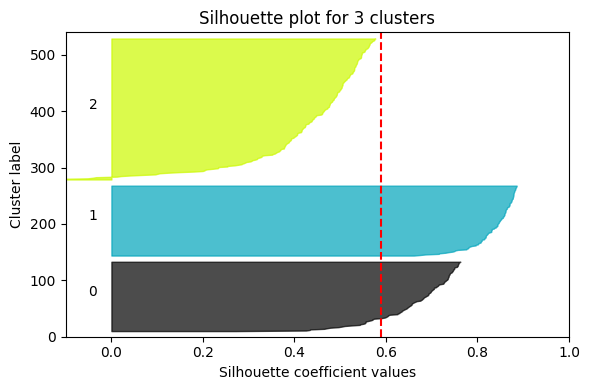

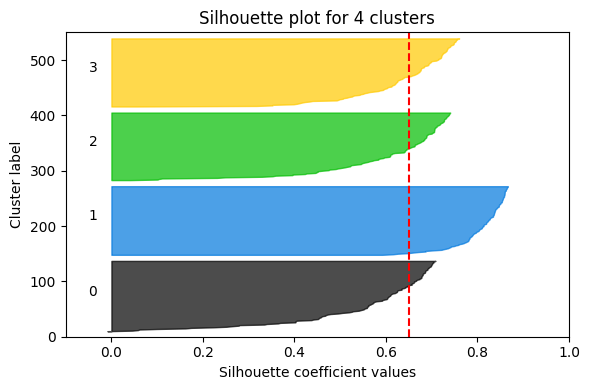

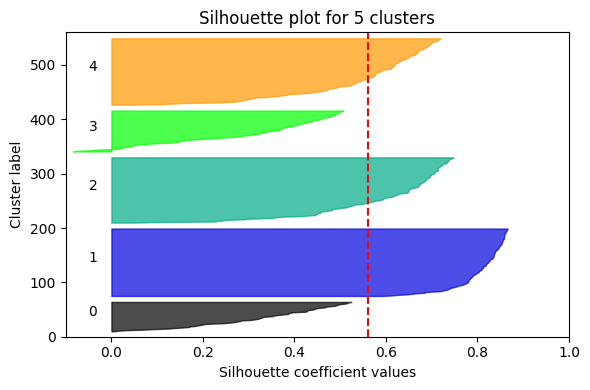

In [25]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y= make_blobs(n_samples=500, n_features= 2, centers=4,
                  cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2개, 3개, 4개, 5개일때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

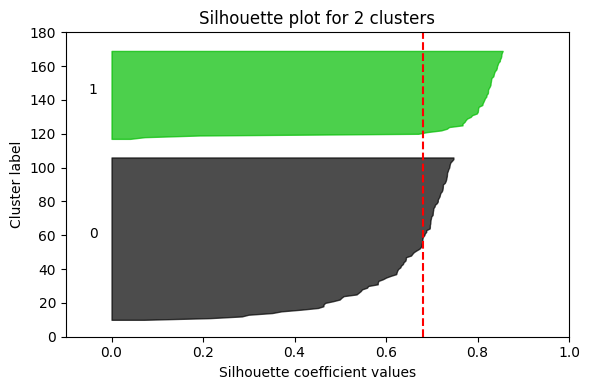

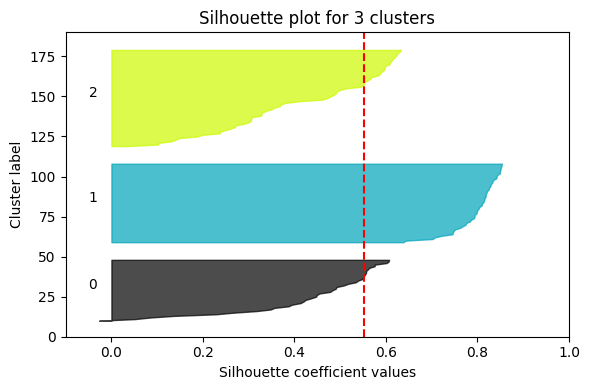

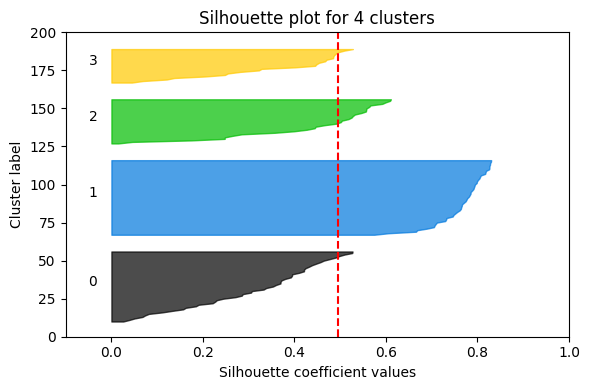

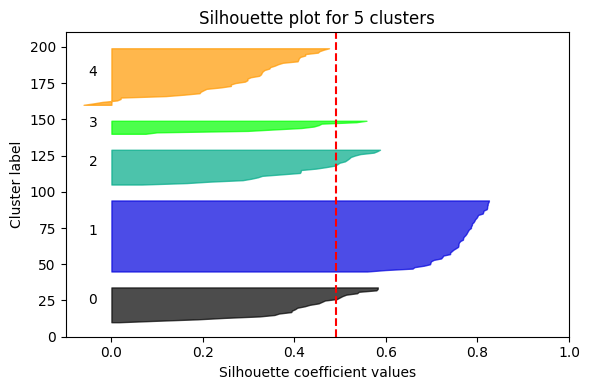

In [27]:
# k-평균 수행 시 최적의 군집개수 살펴보기
from sklearn.datasets import load_iris
iris= load_iris()
visualize_silhouette([2,3,4,5], iris.data)

- k-평균 군집화 -> 군집 개수 2개로 하는 것 좋은듯